<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Actividad 4.- EDA Outliers </font> </center>


> Un dato se considera atípico si aparece por fuera de un rango que se considera válido o aceptable para el fenómeno que se analiza.

> Para determinar si los datos tienen valores atípicos es posible usar gráficas de bigotes en los datos.

> Para cuantificar el rango aceptable o permitido para encontrar datos atípicos se utiliza el parámetro IQR (inter quantilerange).

$$IQR=75^{th}quantile - 25^{th}quantile$$
$$upper_{boundary}=75^{th}quantile+(\alpha*IQR)$$
$$lower_{boundary}=25^{th}quantile-(\alpha*IQR)$$

donde $\alpha$=1.5, y está relacionado a la probabilidad de ocurrencia si los datos tuvieran una distribución normal.

**1.- Considere el dataset `housing.csv`, elimine los outliers de cada columna numérica que se encuentre en el dataset, puede utilizar el código de la celda de abajo**

```
#Funcion para determinar más específicamente los outliers a través del rango IQR

def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

for col in data.columns:
    lmin,lmax = find_boundaries(data[col])
    outliers = np.where(data[col] > lmax, True,np.where(data['Indice_Refraccion'] < lmin, True, False))
    outliers_df = data.loc[outliers, col]
    print(f'column: {col}\n{outliers_df.head()}')
```

**2.- Agregue el código a su librería CDIN, importela y grafique nuevamente con un gráfico de bigotes las columnas numéricas después de haber eliminado los outliers**

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset de precios de casas
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


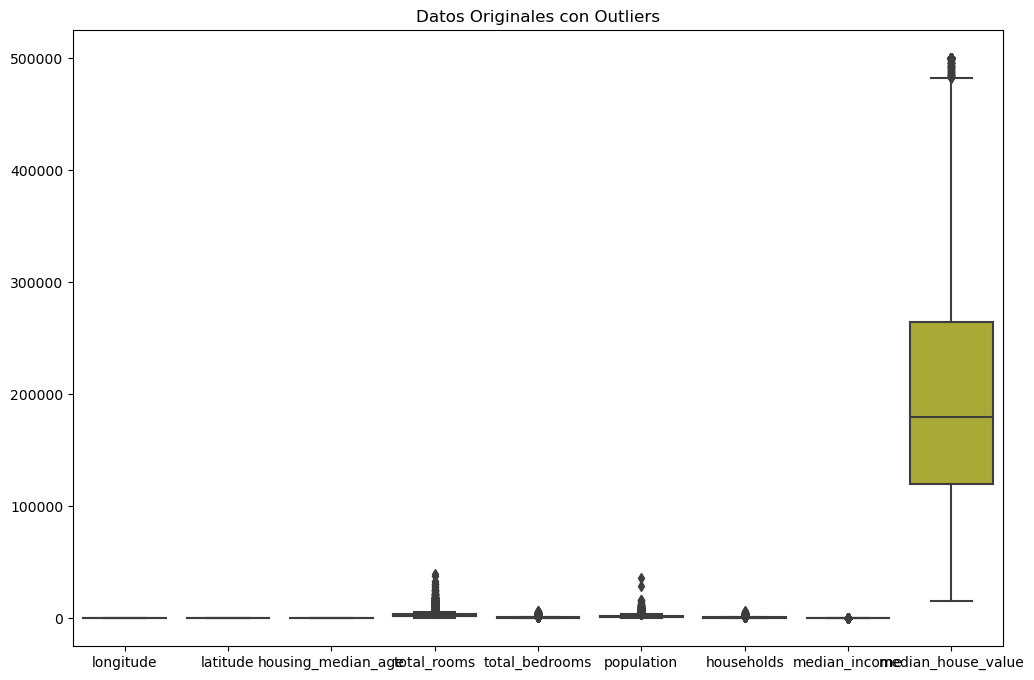

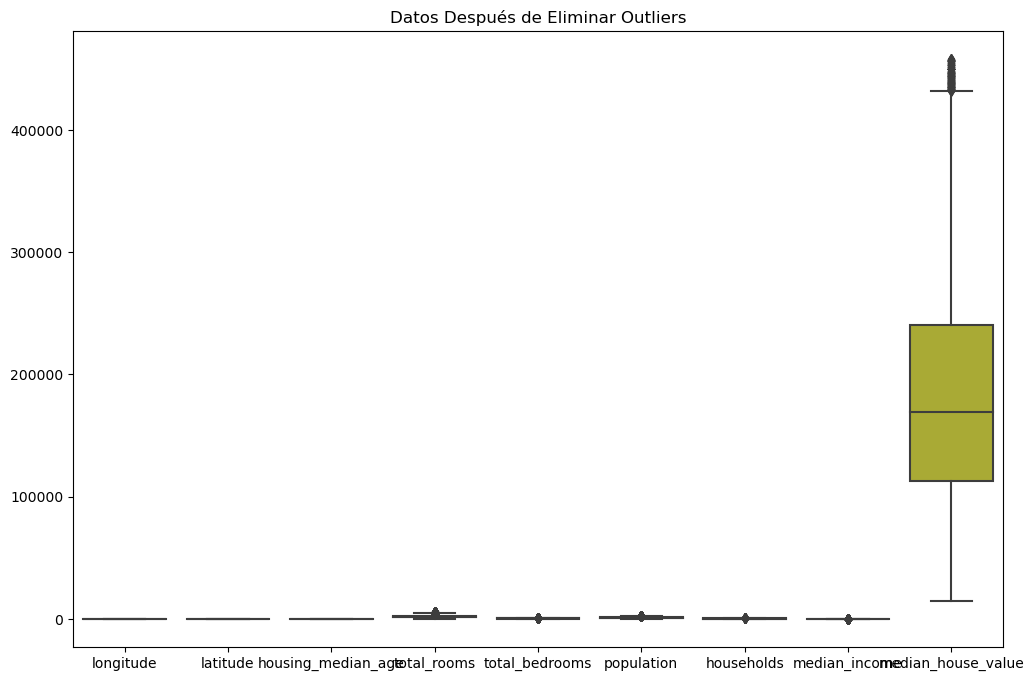

In [2]:
1.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Determinar los límites inferior y superior
def find_boundaries(df_var, distance=1.5):
    IQR = df_var.quantile(0.75) - df_var.quantile(0.25)
    lower = df_var.quantile(0.25) - IQR * distance
    upper = df_var.quantile(0.75) + IQR * distance
    return lower, upper

#Elimina outliers
def remove_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:  # Filtra solo las columnas numéricas
        lower, upper = find_boundaries(df[col])
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

#Cargar el dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


numeric_columns = df.select_dtypes(include=[np.number]).columns


df_cleaned = remove_outliers(df)

#Graficar
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title("Datos Originales con Outliers")
plt.show()

#Graficar después de eliminar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.title("Datos Después de Eliminar Outliers")
plt.show()
